## 15.2 Introduction to Poisson generalised linear modelling (Poisson Regression)

### 15.2.1 Brief Introduction to Poisson Regression
Poisson generalised linear modelling is commonly known as Poisson regression but is sometimes referred to as a log-linear model. Poisson regression is the generalised linear model form of a regression analysis. It is fitted to data when the outcome is assumed to have a Poisson distribution. 

Poisson regression assumes the outcome variable has a Poisson distribution and uses a logarithm as the canonical link function. A link function acts as a bridge between a linear predictor and the mean of the distribution function of choice. The canonical link function is basically the “well-defined” link function and is derived from the exponential density function of the distribution.  

Say we want to model $\mathbf{Y}$ using Poisson Regression so $\mathbf{Y} \sim P(\mu)$ and let the mean $\mu$ (and therefore the variance) depend on a vector of explanatory variables $\mathbf{X}$. We will need to take the linear predictor $\mathbf{X}^T\mathbf{\beta}$ and combine it with a link function ($g$) so that the left hand side of the predictor $\mu$ is always non-negative. We include the link function like this:   

$E[\mathbf{Y}|\mathbf{X}] = \mu = g^{-1} (\mathbf{X}^T\mathbf{\beta})$

Similarly the variance of $\mathbf{Y}$ (Var$[\mathbf{Y}]$) is written:

 $ Var[\mathbf{Y}|\mathbf{X}] = Var[\mu] =Var[ g^{-1} (\mathbf{X}^T\mathbf{\beta})]$
 
The canonical link function for Poisson regression is the logarithm, thus:

$ ln(E[\mathbf{Y} | \mathbf{X}]) = ln(\mu) = \mathbf{X}^T\mathbf{\beta}$

Here $\beta$ contains the regression coefficients. An element of $\beta$ represents the expected change in the natural $log$ of the mean per unit change of one explanatory variable in $X$ (constraining the other elements to not change). 

If you wanted to find the expected value of the outcome variable $\mathbf{Y}$ given $\mathbf{X}$ then the equation looks like this:

$ E[\mathbf{Y}|\mathbf{X}]  = \mu = e^{\mathbf{X^T\beta}}$,

where $\mathbf{\beta}$ can be estimated by the maximum likelihood. 


### 15.2.2 Common Problems in Poisson Regression

There are two frequent common problems when applying Poisson Regression to count data and both are caused by the deviations from the Poisson distribution assumptions. The first problem is overdispersion and the second is zero inflation.

### 15.2.3 Overdispersion
Overdispersion happens with then the variance is no longer equal to the mean but larger. Below is an example of overdispersion. 



[1] "The Mean is"


[1] 28.14815

[1] "The Variance is"


[1] 174.2041

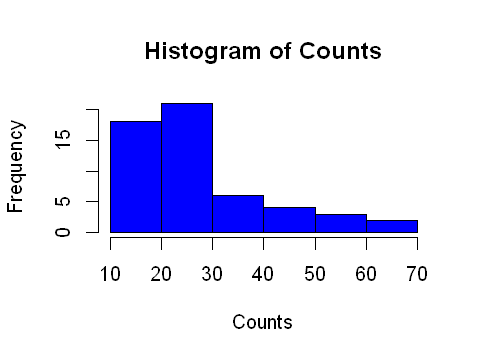

In [3]:
options(repr.plot.width=4, repr.plot.height=3)
#Input some counts
data<- c(26,30,54,25,70,52,51,26,67,18,21,29,17,12,18,35,30,36,36,21,24,18,10,43,28,15,26,27,14,29,19,29,31,41,20,44,42,26,19,16,39,28,21,39,29,20,21,24,17,13,15,15,16,28)
#Histogram of counts
hist(data, xlab="Counts", main="Histogram of Counts", col="blue")
#Mean
print("The Mean is")
mean(data)
#Variance
print("The Variance is")
var(data)
# The mean is a lot smaller than the variance, suggesting overdispersion


We can see here that the variance is a lot larger than the mean which would violate the Poisson distribution principles. There are two main ways to handle overdispersion, the first is through using a negative binomial distribution (not covered here) instead and the second is to implement something called a quasi-likelihood through a Generalised Poisson Regression also called a Quasi-Poisson regression.

### 15.2.4 Quasi-Poisson regression

A Quasi-Poisson regression is often fitted to handle over-dispersion, it uses the same mean regression function and variance function from Poisson regression but allows the dispersion parameter $\phi$ to be unrestriced from 1. In Poisson regression $\phi$ is assumed to be fixed at 1 to make the mean and variance equal, in Quasi-Poisson regression $\phi$ is not fixed and is estimated from the data. Quasi- Poisson regression leads to the same coefficient estimates as the Poisson regression model but inference are adjusted for the over-dispersion through the standard errors.  

### 15.2.5 Zero inflation
Zero inflation happens when the distribution contains a large number of zero’s. For example, if you were to count how many occasions people drank alcohol in a month but included a large number of non-drinkers you will expect to have multiple counts of 0. A zero inflated Poisson distribution often looks like this:



package 'VGAM' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\quant\AppData\Local\Temp\RtmpC6japP\downloaded_packages


Loading required package: stats4
Loading required package: splines


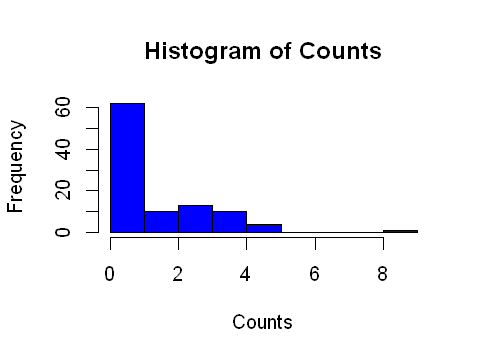

In [4]:
options(repr.plot.width=4, repr.plot.height=3)
#Install package
#install.packages("VGAM")
library("VGAM")

#Number of data points to simulate
n=100
#Shape
lambda=3
#Probability of drawing a zero
p=0.5
#Create data
zip<-rzipois(n, lambda = lambda, pstr0 = p)
#Plot Histogram
hist(zip, xlab="Counts", main="Histogram of Counts", col="blue")

A Zero-Inflated Poisson (ZIP) distribution can be thought of being generated by two processes, the first generates zeros and the second is generated by the Poisson distribution (which will contain zeros). The two processes look like this:

$P[\mathbf{Y}=0] = \pi (1-\pi)e^{- \lambda }$,

$P[\mathbf{Y}=k] = (1-\pi)\frac{\lambda^{k}e^{-\lambda}}{k!}$,

Where $k$ is a non-negative integer value, $\lambda$ is the expected Poisson count and $\pi$ is the probability of extra zeros. The mean of a ZIP is $(1-\pi)\lambda$ and the variance is $\lambda (1-\pi) (1+\pi \lambda)$.

When fitting a ZIP regression the software package combines two parts, a Poisson regression and logistic regression to predict the excess zeros.
